# SetUp

In [53]:
#Import packages and libraries

In [54]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [1]:
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import pandas_profiling
import calendar
from seaborn import pairplot
from sklearn import (
    ensemble,
    model_selection,
    preprocessing,
    tree
)
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
from yellowbrick.model_selection import (
    LearningCurve 
)
from imblearn.over_sampling import (
    SMOTE, ADASYN
)
from seaborn import diverging_palette

from pandas_profiling import ProfileReport

from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)

# import library for visualisations
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from IPython.display import Image

from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Data Import

In [8]:
clv = pd.read_csv(r"C:\Users\shiva\Downloads\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [9]:
clv.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

# Exploratory Data Analysis

Note: This is a very high level exploratory analysis. Please refer to Data Exploration file in the Final Files folder for more detailed analysis. 

In [62]:
clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [63]:
clv.shape

(9134, 24)

In [64]:
clv.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

Text(0, 0.5, 'Data type')

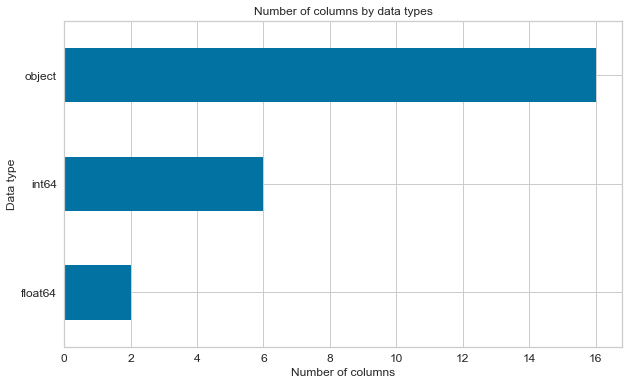

In [65]:
# Count of each type of column
clv.dtypes.value_counts().sort_values().plot(kind='barh',figsize=(10, 6),fontsize=12)
plt.title('Number of columns by data types', fontsize=12)
plt.xlabel('Number of columns', fontsize=12)
plt.ylabel('Data type', fontsize=12)

In [66]:
#number of categories in each column
clv.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Customer             9134
State                   5
Response                2
Coverage                3
Education               5
Effective To Date      59
EmploymentStatus        5
Gender                  2
Location Code           3
Marital Status          3
Policy Type             3
Policy                  9
Renew Offer Type        4
Sales Channel           4
Vehicle Class           6
Vehicle Size            3
dtype: int64

**Summary statistics**

In [67]:
clv.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

**Data Profiling**

In [68]:
# To retrieve the list of variables which are rejected due to high correlation
profile = ProfileReport(clv)
profile

**Notes from pandas profiling report**

-No Missing Values 

-total variables 24

-total observations 9134

-no duplicate rows

-some outliers in monthly premium auto, custome rlifetime value and total claim amount

-Policy and Policy Type are highly correlated

In [69]:
# checking if the data is imbalanced and the distribution of categorical data

def vcounts(clv,colname):
    a = clv[colname].value_counts()
    return a

In [70]:
vcounts(clv,"Response")

#Data is highly imbalanced so would be applying SMOTE to imbalance data later in the analysis

No     7826
Yes    1308
Name: Response, dtype: int64

In [71]:
vcounts(clv,"State")

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [72]:
vcounts(clv,"Coverage")

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [73]:
vcounts(clv,"Education")

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [74]:
vcounts(clv,"EmploymentStatus")

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [75]:
vcounts(clv,"Gender")

F    4658
M    4476
Name: Gender, dtype: int64

In [76]:
vcounts(clv,"Location Code")

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [77]:
vcounts(clv,"Marital Status")

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

In [78]:
vcounts(clv,"Policy Type")

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

In [79]:
vcounts(clv,"Policy")

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [80]:
vcounts(clv,"Renew Offer Type")

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64

In [81]:
vcounts(clv,"Sales Channel")

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

In [82]:
vcounts(clv,"Vehicle Class")

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

In [83]:
vcounts(clv,"Vehicle Size")

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

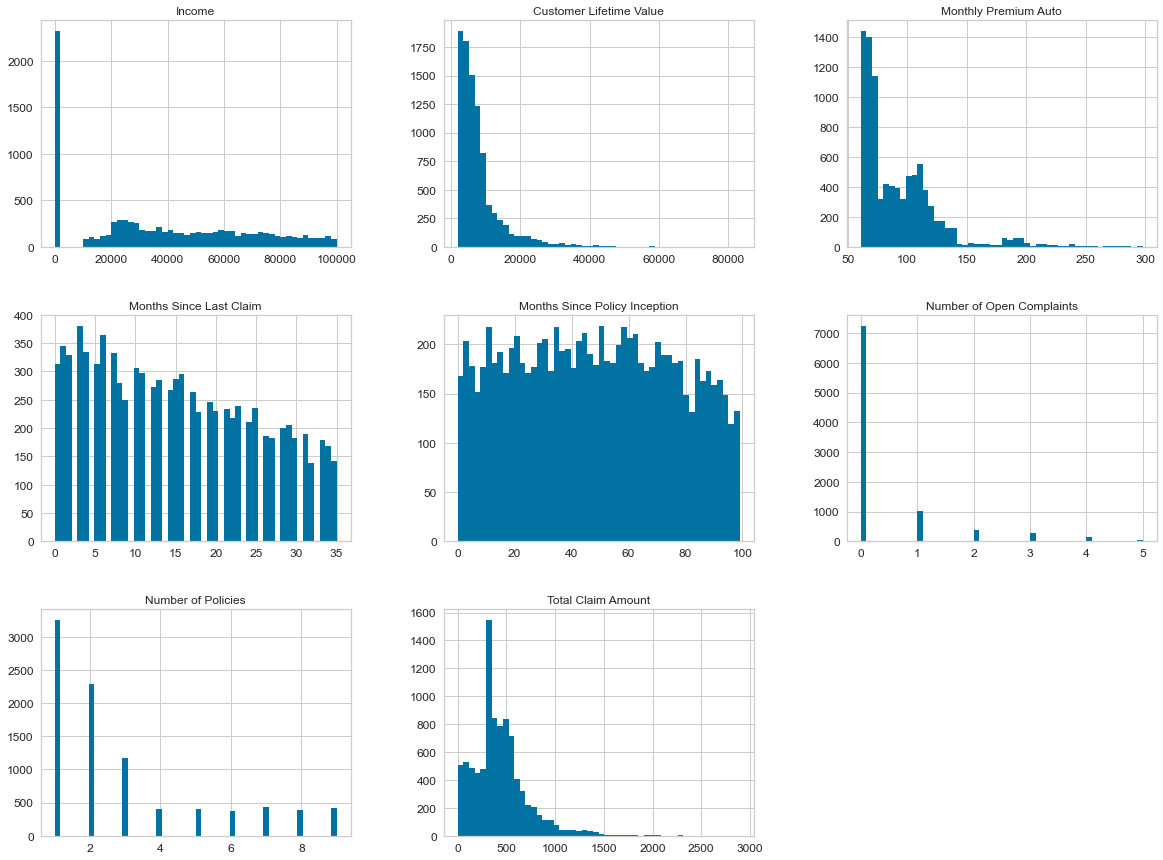

In [84]:
#histograms of continuous variables to check for outliers
attributes = ["Income","Customer Lifetime Value","Monthly Premium Auto","Months Since Last Claim","Months Since Policy Inception","Number of Open Complaints","Number of Policies","Total Claim Amount"]
%matplotlib inline
import matplotlib.pyplot as plt
clv[attributes].hist(bins=50, figsize=(20,15))
plt.show()

# Data Preprocessing and Preparation

The data was very clean without any mission or null values, hence no imputation techniques needed to be used. Additonally, for encoding, one hot encoding was used since none of the variables had any relationship between each other. Label encoding can sometimes induce order/precedence in number.

In [10]:
# Removing variables from the data which don't have any predictive power and Policy Type since its highly correlated.
# Also removed CLV as we assumed that this could be a future event which may create data leakage problems in the analysis.

clv_clean = clv.drop(columns=["Customer","Effective To Date","Policy Type","Customer Lifetime Value"])

In [11]:
#Splitting Features into binary and remaining categorical

binary_feature = clv_clean.nunique()[clv_clean.nunique() == 2].keys().tolist()

In [12]:
binary_feature

['Response', 'Gender']

In [13]:
categorical_feature = [col for col in clv_clean.select_dtypes('object').columns.to_list() if col not in binary_feature]

In [14]:
categorical_feature

['State',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Location Code',
 'Marital Status',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [15]:
# Feature Engineering  - dummyfying the binary and categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in binary_feature:
    clv_clean[i] = le.fit_transform(clv_clean[i])

In [16]:
clv_clean = pd.get_dummies(clv_clean,columns=['State','Coverage','Education','EmploymentStatus','Location Code',
                                              'Marital Status','Policy','Renew Offer Type','Sales Channel','Vehicle Class',
                                             'Vehicle Size'])

In [17]:
clv_clean.columns

Index(['Response', 'Gender', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'State_Arizona', 'State_California', 'State_Nevada', 'State_Oregon',
       'State_Washington', 'Coverage_Basic', 'Coverage_Extended',
       'Coverage_Premium', 'Education_Bachelor', 'Education_College',
       'Education_Doctor', 'Education_High School or Below',
       'Education_Master', 'EmploymentStatus_Disabled',
       'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave',
       'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed',
       'Location Code_Rural', 'Location Code_Suburban', 'Location Code_Urban',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Policy_Corporate L1', 'Policy_Corporate L2',
       'Policy_Corporate L3', 'Policy_Personal L1', 'Policy_Personal L2',
       'Policy_Personal L3', 'Poli

In [18]:
clv_clean.head()

Response  Gender  Income  Monthly Premium Auto  Months Since Last Claim  \
0         0       0   56274                    69                       32   
1         0       0       0                    94                       13   
2         0       0   48767                   108                       18   
3         0       1       0                   106                       18   
4         0       1   43836                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies  Total Claim Amount  State_Arizona  ...  \
0                   1          384.811147              0  ...   
1                   8         1131.464935              1  ...   
2                   2          566.472247              0  ...   
3                   7          529.881344              0  ...   
4                   1          138.130879              0  ...   

   Sales Channel_Web  Vehicle Class_Four-Door Car  Vehicle Class_Luxury Car  \
0                  0                            0                         0   
1                  0                            1                         0   
2                  0                            0                         0   
3                  0                            0                         0   
4                  0                            1                         0   

   Vehicle Class_Luxury SUV  Vehicle Class_SUV  Vehicle Class_Sports Car  \
0                         0                  0                         0   
1                         0                  0                         0   
2                         0                  0                         0   
3                         0                  1                         0   
4                         0                  0                         0   

   Vehicle Class_Two-Door Car  Vehicle Size_Large  Vehicle Size_Medsize  \
0                           1                   0                     1   
1                           0                   0                     1   
2                           1                   0                     1   
3                           0                   0                     1   
4                           0                   0                     1   

   Vehicle Size_Small  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 59 columns]

<AxesSubplot:>

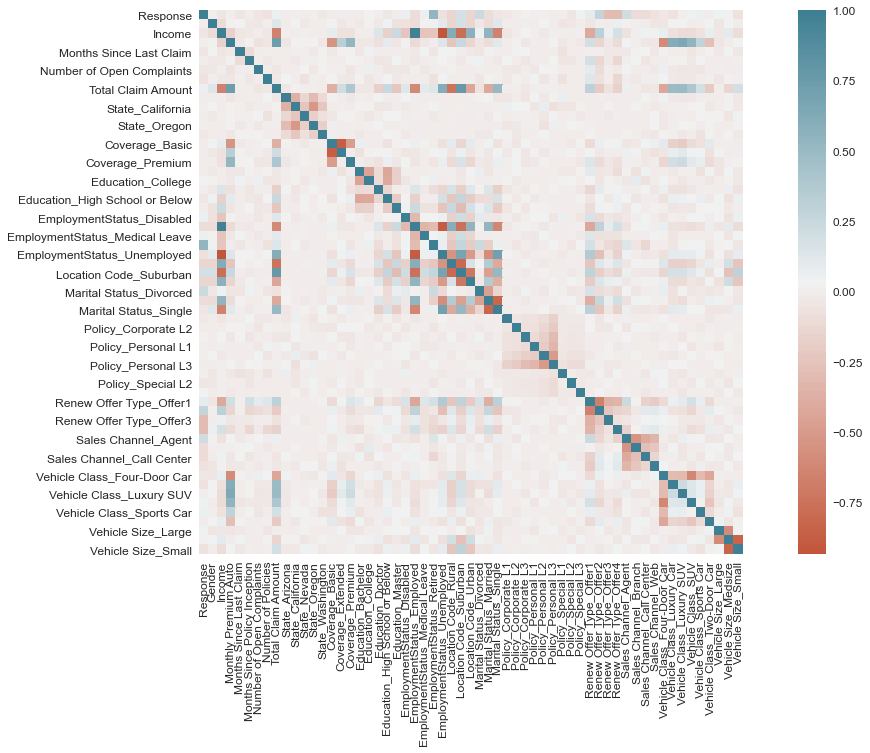

In [19]:
# detecting correlations between variables
data_corr = clv_clean.corr()

plt.figure(figsize=(20,10))
sns.heatmap(data_corr.corr(), cmap = sns.diverging_palette(20, 220, n=200),square=True)

In [95]:
data_corr["Response"].sort_values(ascending=False)

Response                          1.000000
EmploymentStatus_Retired          0.295645
Renew Offer Type_Offer2           0.177504
Location Code_Suburban            0.116990
Marital Status_Divorced           0.112042
Sales Channel_Agent               0.108201
Renew Offer Type_Offer1           0.036028
Vehicle Size_Large                0.033370
Vehicle Class_Sports Car          0.028869
Policy_Special L3                 0.024276
Vehicle Class_SUV                 0.024230
EmploymentStatus_Medical Leave    0.023761
EmploymentStatus_Disabled         0.021262
Education_Doctor                  0.018152
Total Claim Amount                0.016877
Education_College                 0.016526
Education_Master                  0.015898
Vehicle Size_Medsize              0.015105
Income                            0.011932
Monthly Premium Auto              0.010966
Policy_Special L1                 0.009405
Vehicle Class_Luxury SUV          0.008122
Policy_Personal L1                0.006780
Policy_Corp

No variable was highly correlated with Response as none had the coefficient greater than 0.85

**Splitting the data into Target and independent variables**

In [20]:
X = clv_clean.drop(columns=["Response"])
y = clv_clean["Response"]

**Splitting dataset into training and testing**

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [22]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

6393
2741
6393
2741


**Standardising Data**

Since the numerical variables had different scales, the data was standardized. 

In [23]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X_train = standardizer.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns = X.columns)
X_test = standardizer.transform(X_test)
X_test = pd.DataFrame(X_test,columns = X.columns)

# Feature Selection

Feature selection is performed using Recursice Feature Elimination and after a lot of trial and error with the number of features, it was decided that the best performance of the model was obtained using 50 out of total of 60 features. Additionally, Customer Lifetime Value was already excluded as part of features because of potential data leakage. 

In [100]:
#Recursive Feature Elimination Method
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rfe = RFE(rf, n_features_to_select=50)
model_l = rfe.fit(X_train, y_train)
model_l_df = pd.DataFrame(list(zip(X_train.columns,model_l.ranking_)), columns = ['predictor','ranking'])
model_l_df

predictor  ranking
0                           Gender        1
1                           Income        1
2             Monthly Premium Auto        1
3          Months Since Last Claim        1
4    Months Since Policy Inception        1
5        Number of Open Complaints        1
6               Number of Policies        1
7               Total Claim Amount        1
8                    State_Arizona        1
9                 State_California        1
10                    State_Nevada        2
11                    State_Oregon        1
12                State_Washington        1
13                  Coverage_Basic        1
14               Coverage_Extended        1
15                Coverage_Premium        1
16              Education_Bachelor        1
17               Education_College        1
18                Education_Doctor        1
19  Education_High School or Below        1
20                Education_Master        1
21       EmploymentStatus_Disabled        1
22       EmploymentStatus_Employed        1
23  EmploymentStatus_Medical Leave        1
24        EmploymentStatus_Retired        1
25     EmploymentStatus_Unemployed        1
26             Location Code_Rural        1
27          Location Code_Suburban        1
28             Location Code_Urban        1
29         Marital Status_Divorced        1
30          Marital Status_Married        1
31           Marital Status_Single        1
32             Policy_Corporate L1        4
33             Policy_Corporate L2        3
34             Policy_Corporate L3        1
35              Policy_Personal L1        1
36              Policy_Personal L2        1
37              Policy_Personal L3        1
38               Policy_Special L1        9
39               Policy_Special L2        7
40               Policy_Special L3        5
41         Renew Offer Type_Offer1        1
42         Renew Offer Type_Offer2        1
43         Renew Offer Type_Offer3        1
44         Renew Offer Type_Offer4        1
45             Sales Channel_Agent        1
46            Sales Channel_Branch        1
47       Sales Channel_Call Center        1
48               Sales Channel_Web        1
49     Vehicle Class_Four-Door Car        1
50        Vehicle Class_Luxury Car        8
51        Vehicle Class_Luxury SUV        6
52               Vehicle Class_SUV        1
53        Vehicle Class_Sports Car        1
54      Vehicle Class_Two-Door Car        1
55              Vehicle Size_Large        1
56            Vehicle Size_Medsize        1
57              Vehicle Size_Small        1

In [101]:
# Random Forest Feature Elimination with coefficients
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
model_rf = rf.fit(X_train,y_train)
model_rf.feature_importances_
model_rf_df = pd.DataFrame(list(zip(X.columns,model_rf.feature_importances_)),columns=['predictor','feature importance'])
model_rf_df

predictor  feature importance
0                           Gender            0.013241
1                           Income            0.115688
2             Monthly Premium Auto            0.088362
3          Months Since Last Claim            0.083403
4    Months Since Policy Inception            0.102968
5        Number of Open Complaints            0.020943
6               Number of Policies            0.046728
7               Total Claim Amount            0.104202
8                    State_Arizona            0.002912
9                 State_California            0.003310
10                    State_Nevada            0.002268
11                    State_Oregon            0.002532
12                State_Washington            0.002662
13                  Coverage_Basic            0.005661
14               Coverage_Extended            0.005987
15                Coverage_Premium            0.004643
16              Education_Bachelor            0.010507
17               Education_College            0.010046
18                Education_Doctor            0.009528
19  Education_High School or Below            0.008953
20                Education_Master            0.009977
21       EmploymentStatus_Disabled            0.004883
22       EmploymentStatus_Employed            0.003278
23  EmploymentStatus_Medical Leave            0.006813
24        EmploymentStatus_Retired            0.093619
25     EmploymentStatus_Unemployed            0.001697
26             Location Code_Rural            0.001434
27          Location Code_Suburban            0.010225
28             Location Code_Urban            0.003668
29         Marital Status_Divorced            0.013592
30          Marital Status_Married            0.010409
31           Marital Status_Single            0.013509
32             Policy_Corporate L1            0.001665
33             Policy_Corporate L2            0.002269
34             Policy_Corporate L3            0.002904
35              Policy_Personal L1            0.003884
36              Policy_Personal L2            0.002843
37              Policy_Personal L3            0.002725
38               Policy_Special L1            0.000449
39               Policy_Special L2            0.000701
40               Policy_Special L3            0.002080
41         Renew Offer Type_Offer1            0.016582
42         Renew Offer Type_Offer2            0.032189
43         Renew Offer Type_Offer3            0.004432
44         Renew Offer Type_Offer4            0.006512
45             Sales Channel_Agent            0.017061
46            Sales Channel_Branch            0.011049
47       Sales Channel_Call Center            0.010606
48               Sales Channel_Web            0.007597
49     Vehicle Class_Four-Door Car            0.006313
50        Vehicle Class_Luxury Car            0.000414
51        Vehicle Class_Luxury SUV            0.001919
52               Vehicle Class_SUV            0.006632
53        Vehicle Class_Sports Car            0.005263
54      Vehicle Class_Two-Door Car            0.005858
55              Vehicle Size_Large            0.011390
56            Vehicle Size_Medsize            0.007196
57              Vehicle Size_Small            0.011816

In [102]:
#model_rf_df.to_csv(r"C:\Users\Nupur\OneDrive - McGill University\Desktop\McGill Notes\INSY695075\features.csv")

In [24]:
#removing useless predictors

X_train = X_train.drop(columns = ['State_Nevada','Policy_Corporate L2','Policy_Corporate L1','Policy_Special L3','Vehicle Class_Luxury SUV','Policy_Special L2','Vehicle Class_Luxury Car','Policy_Special L1'])
X_test = X_test.drop(columns = ['State_Nevada','Policy_Corporate L2','Policy_Corporate L1','Policy_Special L3','Vehicle Class_Luxury SUV','Policy_Special L2','Vehicle Class_Luxury Car','Policy_Special L1'])

**Dealing with imbalanced data**

The data was highly imbalanced with around 14% of the people only accounting for people who accepted the renewal offers. Hence, SMOTE was used to balance the data. 

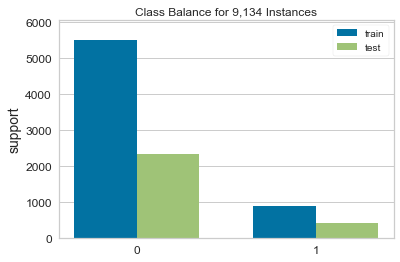

<AxesSubplot:title={'center':'Class Balance for 9,134 Instances'}, ylabel='support'>

In [25]:
from yellowbrick.target import ClassBalance

# Instantiate the visualizer
visualizer = ClassBalance(labels=["0", "1"])

visualizer.fit(y_train, y_test)        # Fit the data to the visualizer
visualizer.show()

In [26]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [27]:
y_train.value_counts()

0    5503
1     890
Name: Response, dtype: int64

In [28]:
y_train_sm.value_counts()

0    5503
1    5503
Name: Response, dtype: int64

In [29]:
#ROC curve
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [30]:
#PR Curve
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

In [31]:
#Classification Score
def clf_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        
        precision, recall, _ = precision_recall_curve(y_test, clf.predict(X_test))
        average_precision = average_precision_score(y_test, clf.predict(X_test))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_test, clf.predict(X_test))
        roc_auc = roc_auc_score(y_test, clf.predict(X_test))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))
        plot_confusion_matrix(clf,  X_test, clf.predict(X_test))
        print("End of validation Result\n")

In [111]:
#classification matrix
def evaluation_metrics(y_actual, y_pred):
            
        precision, recall, _ = precision_recall_curve(y_actual, y_pred)
        average_precision = average_precision_score(y_actual, y_pred)
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_actual, y_pred)
        roc_auc = roc_auc_score(y_actual, y_pred)
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_actual, y_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_actual, y_pred)))

In [112]:
gc.collect()

451808

# Building Models with fine tunings

**Logistic Regression Model**

In [32]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train_sm, y_train_sm)
y_pred_lr = model_lr.predict(X_test)
lr_corr = metrics.confusion_matrix(y_test, y_pred_lr)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_lr)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_lr)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_lr)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_lr)))

Accuracy_Score: 0.7190806275082087
Precision_Score: 0.31473684210526315
Recall_Score: 0.715311004784689
F1_Score: 0.43713450292397665


**Classification Report**

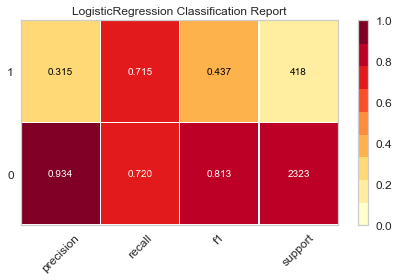

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [63]:
from yellowbrick.classifier import ClassificationReport

classes = ["0", "1"]

visualizer = ClassificationReport(
    model_lr, classes=classes, support=True, is_fitted=True
)

visualizer.fit(X_train_sm, y_train_sm)
visualizer.score(X_test, y_test)   
visualizer.show()

**Confusion Matrix**

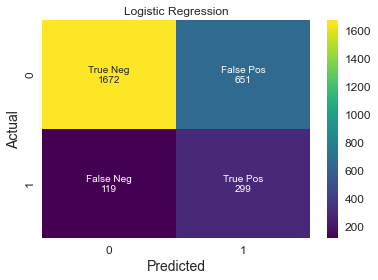

In [64]:
# Confusion Matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                lr_corr.flatten()]

labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(lr_corr, fmt = '',cmap = 'viridis', annot=labels);
title = "Logistic Regression"
ylabel = "Actual"
xlabel = "Predicted"
plt.title(title)
plt.ylabel(ylabel)
plt.xlabel(xlabel);

**PR Curve**

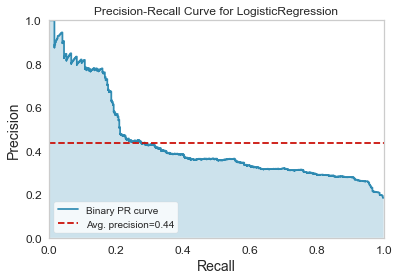

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [65]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model_lr, is_fitted=True)
viz.fit(X_train_sm, y_train_sm)
viz.score(X_test, y_test)
viz.show()

**ROC-AUC**

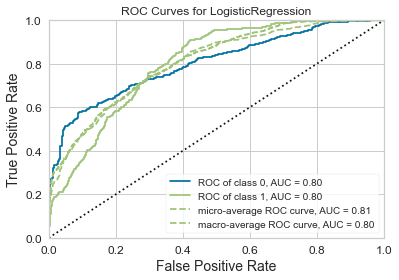

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [66]:
visualizer = ROCAUC(
    model_lr, classes=classes, is_fitted=True
)

visualizer.fit(X_train_sm, y_train_sm)
visualizer.score(X_test, y_test)
visualizer.show()

**Discrimintation Threshold**

This takes quite some time to run, so run it only when you have to write about the business insights.

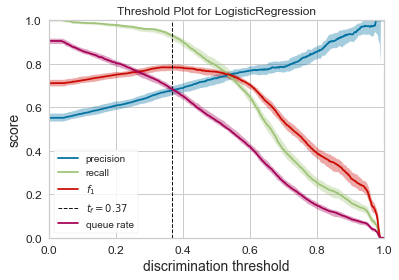

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [67]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(model_lr, is_fitted=True)
visualizer.fit(X_train_sm, y_train_sm)
visualizer.poof()

**Random Forest Model**

In [33]:
# Fitting the Model and getting accuracy, precision and recall scores

from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(random_state=0)
model_rfc.fit(X_train_sm, y_train_sm)
y_pred_rfc = model_rfc.predict(X_test)
rfc_corr = metrics.confusion_matrix(y_test, y_pred_rfc)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_rfc)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_rfc)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_rfc)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_rfc)))

Accuracy_Score: 0.9470995986866108
Precision_Score: 0.9504950495049505
Recall_Score: 0.6889952153110048
F1_Score: 0.7988904299583912


In [42]:
#Random Forest Classifier hyper tuning 

#Model Built
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [100, 150, 200],
    'max_features': ['auto', "sqrt", "log2"],
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfc_result = CV_rfc.fit(X_train_sm, y_train_sm)
CV_rfc.cv_results_
df_rfc = pd.DataFrame(CV_rfc.cv_results_)
df_rfc

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.131795      0.393890         0.138922        0.030082   
1       4.638958      1.356917         0.179296        0.032779   
2       6.634324      1.290977         0.266301        0.075617   
3       2.624421      0.115475         0.110536        0.013195   
4       3.851299      0.160310         0.168511        0.024836   
5       7.374092      1.392790         0.261978        0.050127   
6       2.231666      0.050109         0.118589        0.013159   
7       3.367462      0.138243         0.179037        0.013413   
8       5.045638      0.480833         0.254347        0.016047   

  param_max_features param_n_estimators  \
0               auto                100   
1               auto                150   
2               auto                200   
3               sqrt                100   
4               sqrt                150   
5               sqrt                200   
6               log2                100   
7               log2                150   
8               log2                200   

                                          params  split0_test_score  \
0  {'max_features': 'auto', 'n_estimators': 100}           0.896458   
1  {'max_features': 'auto', 'n_estimators': 150}           0.896004   
2  {'max_features': 'auto', 'n_estimators': 200}           0.894187   
3  {'max_features': 'sqrt', 'n_estimators': 100}           0.896458   
4  {'max_features': 'sqrt', 'n_estimators': 150}           0.896004   
5  {'max_features': 'sqrt', 'n_estimators': 200}           0.894187   
6  {'max_features': 'log2', 'n_estimators': 100}           0.905086   
7  {'max_features': 'log2', 'n_estimators': 150}           0.906903   
8  {'max_features': 'log2', 'n_estimators': 200}           0.905995   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.995002           0.992276           0.991822           0.989096   
1           0.994548           0.992731           0.992731           0.991368   
2           0.995002           0.992731           0.993185           0.990913   
3           0.995002           0.992276           0.991822           0.989096   
4           0.994548           0.992731           0.992731           0.991368   
5           0.995002           0.992731           0.993185           0.990913   
6           0.996365           0.995002           0.991822           0.989550   
7           0.995457           0.994548           0.992276           0.990459   
8           0.995911           0.994548           0.992276           0.989550   

   mean_test_score  std_test_score  rank_test_score  
0         0.972931        0.038282                8  
1         0.973476        0.038749                4  
2         0.973204        0.039530                6  
3         0.972931        0.038282                8  
4         0.973476        0.038749                4  
5         0.973204        0.039530                6  
6         0.975565        0.035320                3  
7         0.975928        0.034557                1  
8         0.975656        0.034897                2

In [43]:
print(f'Best Accuracy: {rfc_result.best_score_} for {rfc_result.best_params_}')

Best Accuracy: 0.9759284958822697 for {'max_features': 'log2', 'n_estimators': 150}


In [44]:
# Fitting the Model and getting accuracy, precision and recall scores

model_rfc1 = RandomForestClassifier(max_features='log2',n_estimators=150)
model_rfc1.fit(X_train_sm, y_train_sm)
y_pred_rfc1 = model_rfc1.predict(X_test)
rfc_corr1 = metrics.confusion_matrix(y_test, y_pred_rfc1)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_rfc1)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_rfc1)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_rfc1)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_rfc1)))

Accuracy_Score: 0.9489237504560379
Precision_Score: 0.9633333333333334
Recall_Score: 0.6913875598086124
F1_Score: 0.8050139275766016


**Classification Report**

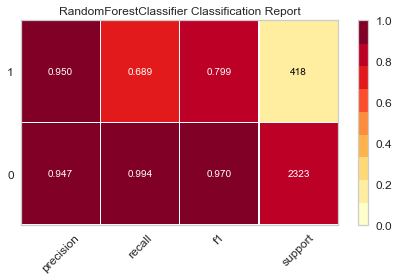

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [71]:
from yellowbrick.classifier import ClassificationReport

classes2 = ["0", "1"]

visualizer2 = ClassificationReport(
    model_rfc, classes=classes2, support=True, is_fitted=True
)

visualizer2.fit(X_train_sm, y_train_sm)
visualizer2.score(X_test, y_test)   
visualizer2.show()

**Confusion Matrix**

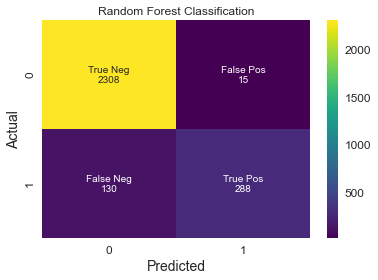

In [72]:
# Confusion Matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                rfc_corr.flatten()]

labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(rfc_corr, fmt = '',cmap = 'viridis', annot=labels);
title = "Random Forest Classification"
ylabel = "Actual"
xlabel = "Predicted"
plt.title(title)
plt.ylabel(ylabel)
plt.xlabel(xlabel);

**PR Curve**

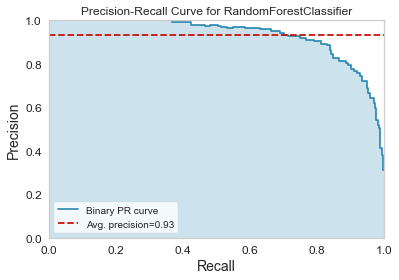

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [73]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz2 = PrecisionRecallCurve(model_rfc, is_fitted=True)
viz2.fit(X_train_sm, y_train_sm)
viz2.score(X_test, y_test)
viz2.show()

**ROC-AUC**

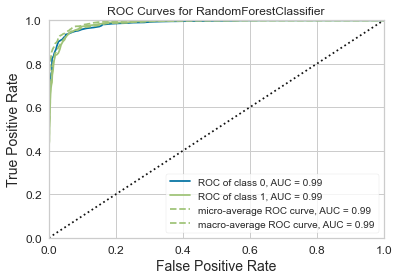

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [74]:
visualizerroc2 = ROCAUC(
    model_rfc, classes=classes2, is_fitted=True
)

visualizerroc2.fit(X_train_sm, y_train_sm)
visualizerroc2.score(X_test, y_test)
visualizerroc2.show()

**Discrimintation Threshold**


This takes quite some time to run, so run it only when you have to write about the business insights.

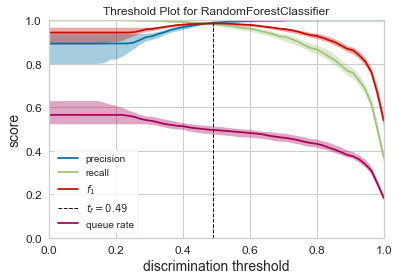

<AxesSubplot:title={'center':'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [75]:
visualizer = DiscriminationThreshold(model_rfc, is_fitted=True)

visualizer.fit(X_train_sm, y_train_sm)
visualizer.poof()

**Feature Importance**

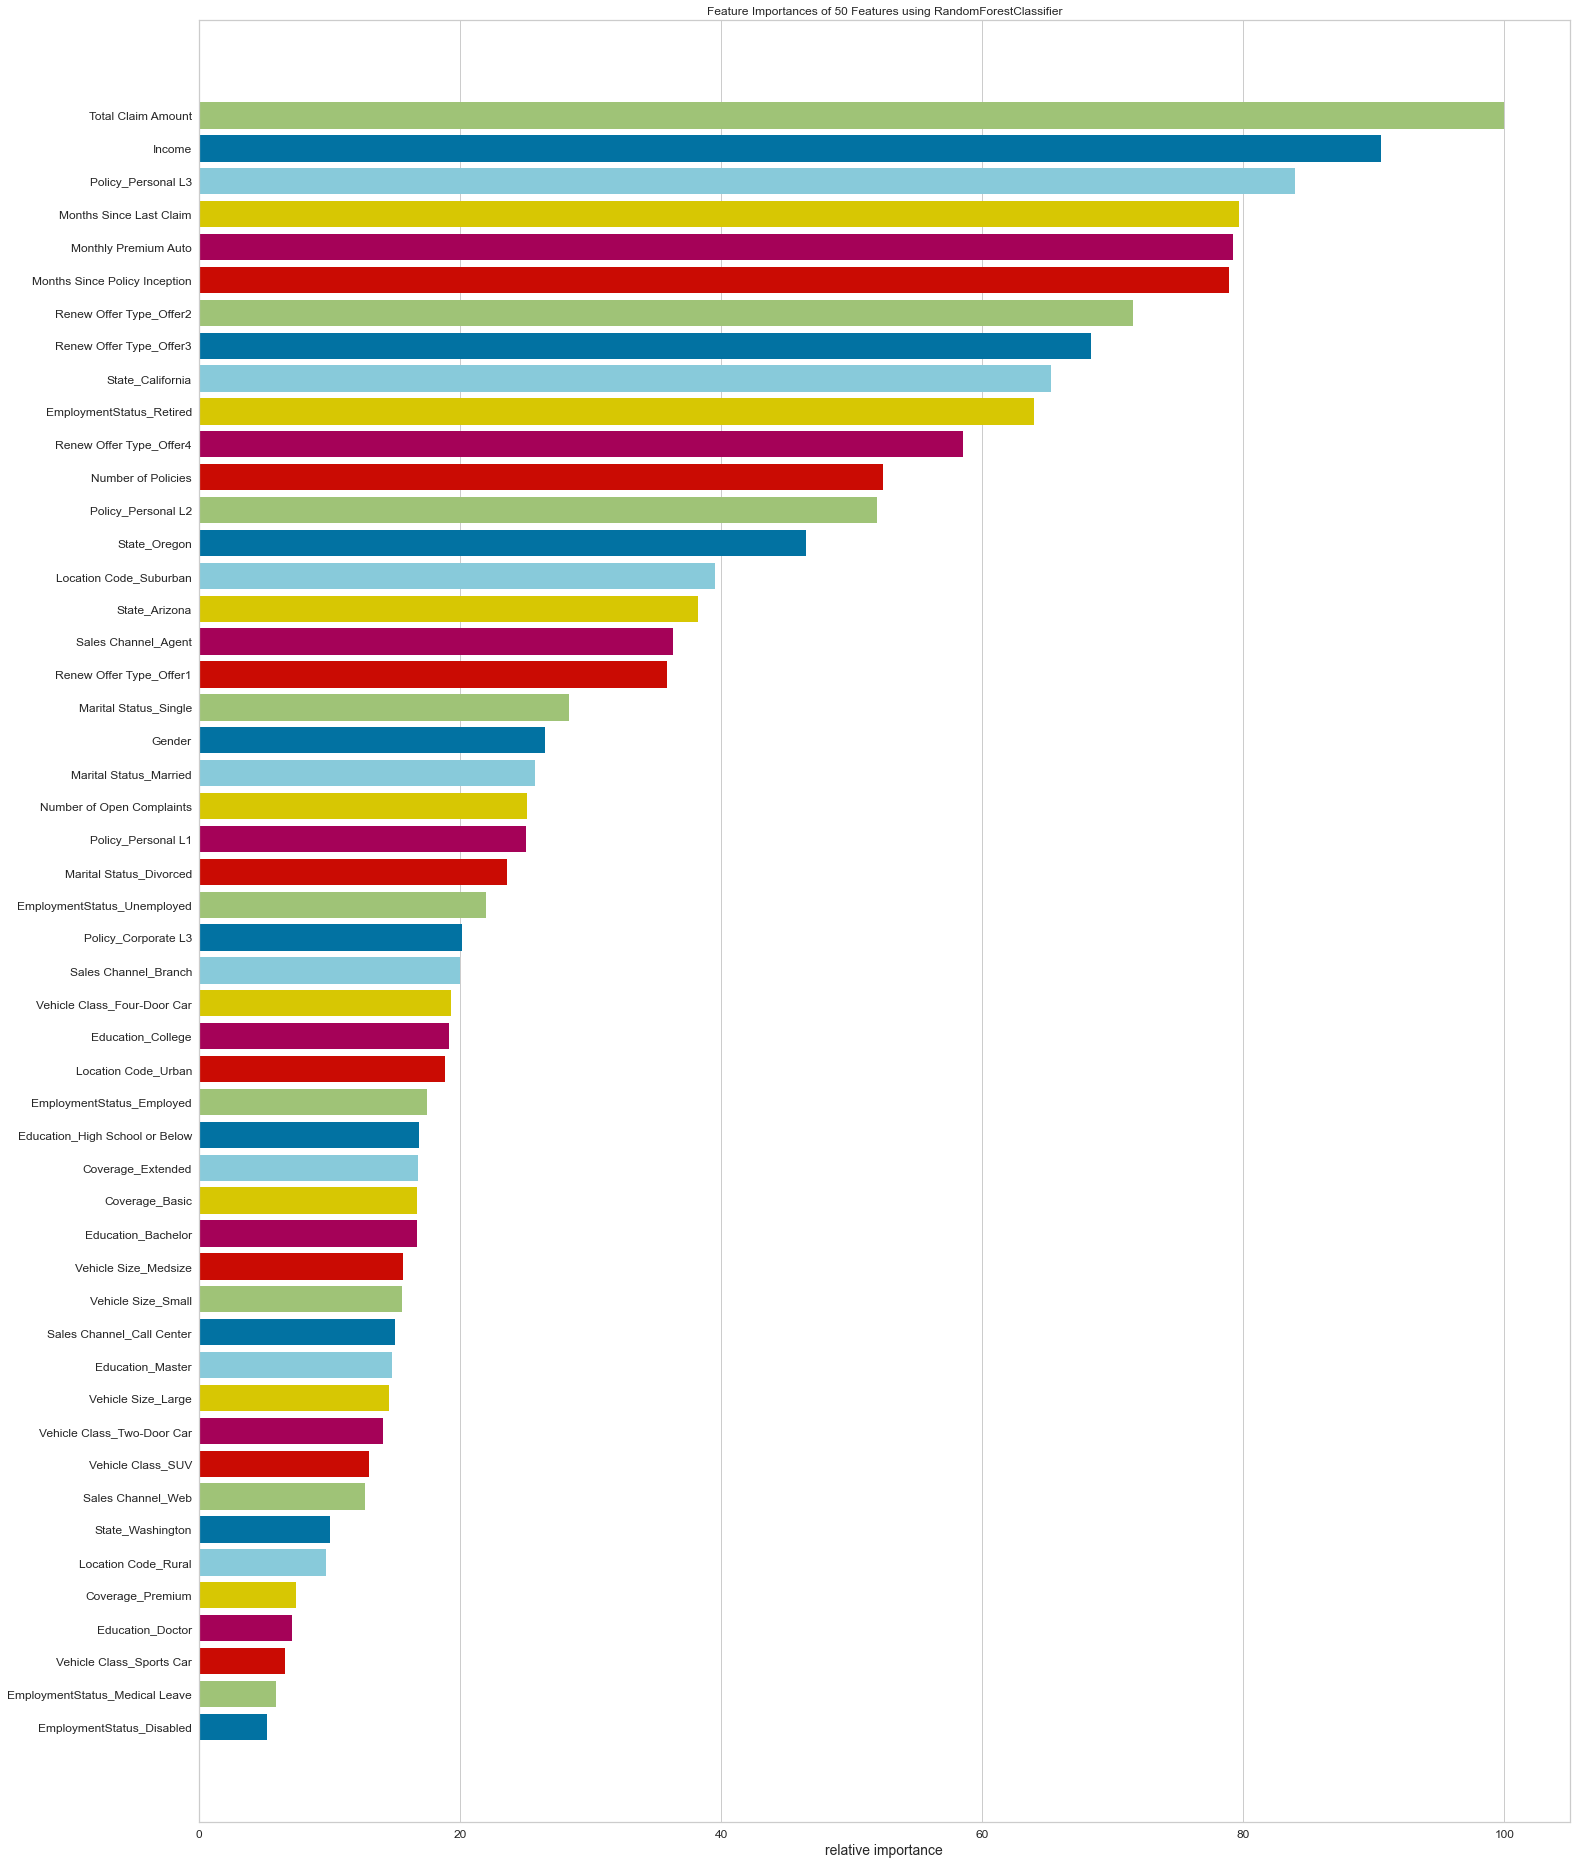

<AxesSubplot:title={'center':'Feature Importances of 50 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [76]:
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(22, 26))
viz = FeatureImportances(model_rfc, labels=X_train_sm.columns)
viz.fit(X_train_sm, y_train_sm)
viz.poof()

**Gradient Boosting Classifier Model**

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbt = GradientBoostingClassifier()
model_gbt.fit(X_train_sm, y_train_sm)
y_pred_gbt = model_gbt.predict(X_test)
gbt_corr = metrics.confusion_matrix(y_test, y_pred_gbt)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_gbt)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_gbt)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_gbt)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_gbt)))

Accuracy_Score: 0.8628237869390734
Precision_Score: 0.6029411764705882
Recall_Score: 0.2942583732057416
F1_Score: 0.3954983922829582


In [49]:
# Gradient Boosting Classifier

# Model Built

from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(random_state=0)
parameters = {
    "learning_rate": [0.01, 0.025, 0.05,],
    "max_depth":[3,5],
    "max_features":["log2","sqrt"],
    "n_estimators":[100,200]
    }

clf = GridSearchCV(estimator=gbt, param_grid=parameters, cv=5,verbose = 0)
gbt_result = clf.fit(X_train, y_train)
clf.cv_results_
df_gbt = pd.DataFrame(clf.cv_results_)
df_gbt

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.563743      0.072047         0.014076        0.005978   
1        1.360378      0.309452         0.021917        0.007373   
2        0.879915      0.143368         0.017574        0.007479   
3        1.273728      0.096894         0.016136        0.004993   
4        0.896929      0.045136         0.017407        0.001918   
5        1.821608      0.143441         0.024439        0.007023   
6        1.031010      0.008922         0.017217        0.004683   
7        2.315352      0.117261         0.028161        0.003178   
8        0.550784      0.031928         0.012645        0.002529   
9        1.218483      0.106896         0.019040        0.001887   
10       0.696889      0.087221         0.013170        0.002383   
11       1.247464      0.035569         0.015605        0.000702   
12       0.889039      0.013111         0.016987        0.002059   
13       1.856319      0.139659         0.021888        0.003795   
14       1.053344      0.011566         0.015821        0.003368   
15       2.900985      0.371419         0.031136        0.008370   
16       0.605440      0.036511         0.012322        0.003867   
17       1.280921      0.186691         0.017061        0.006822   
18       0.679841      0.111483         0.011527        0.001614   
19       1.238561      0.049608         0.018474        0.002682   
20       1.002807      0.138336         0.018196        0.003341   
21       2.170899      0.342167         0.027511        0.002546   
22       1.427731      0.027986         0.022103        0.004453   
23       2.683026      0.378532         0.027048        0.007874   

   param_learning_rate param_max_depth param_max_features param_n_estimators  \
0                0.010               3               log2                100   
1                0.010               3               log2                200   
2                0.010               3               sqrt                100   
3                0.010               3               sqrt                200   
4                0.010               5               log2                100   
5                0.010               5               log2                200   
6                0.010               5               sqrt                100   
7                0.010               5               sqrt                200   
8                0.025               3               log2                100   
9                0.025               3               log2                200   
10               0.025               3               sqrt                100   
11               0.025               3               sqrt                200   
12               0.025               5               log2                100   
13               0.025               5               log2                200   
14               0.025               5               sqrt                100   
15               0.025               5               sqrt                200   
16               0.050               3               log2                100   
17               0.050               3               log2                200   
18               0.050               3               sqrt                100   
19               0.050               3               sqrt                200   
20               0.050               5               log2                100   
21               0.050               5               log2                200   
22               0.050               5               sqrt                100   
23               0.050               5               sqrt                200   

                                               params  split0_test_score  \
0   {'learning_rate': 0.01, 'max_depth': 3, 'max_f...           0.860829   
1   {'learning_rate': 0.01, 'max_depth': 3, 'max_f...           0.864738   
2   {'learning_rate': 0.01, 'max_depth': 3, 'max_f...           0.860829  

In [50]:
print(f'Best Accuracy: {gbt_result.best_score_} for {gbt_result.best_params_}')

Best Accuracy: 0.9235090501308607 for {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}


In [51]:
#Fitting the Model and getting accuracy, precision and recall scores
model_gbt = GradientBoostingClassifier(learning_rate=0.05,max_depth=5,max_features='sqrt',n_estimators=200)
model_gbt.fit(X_train_sm, y_train_sm)
y_pred_gbt = model_gbt.predict(X_test)
gbt_corr = metrics.confusion_matrix(y_test, y_pred_gbt)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_gbt)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_gbt)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_gbt)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_gbt)))

Accuracy_Score: 0.8799708135716892
Precision_Score: 0.6772908366533864
Recall_Score: 0.40669856459330145
F1_Score: 0.508221225710015


**Classification Report**

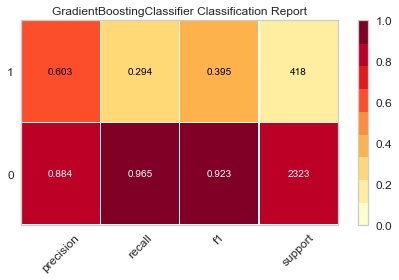

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [80]:
from yellowbrick.classifier import ClassificationReport

classes3 = ["0", "1"]

visualizer3 = ClassificationReport(
    model_gbt, classes=classes3, support=True, is_fitted=True
)

visualizer3.fit(X_train_sm, y_train_sm)
visualizer3.score(X_test, y_test)   
visualizer3.show()

**Confusion Matrix**

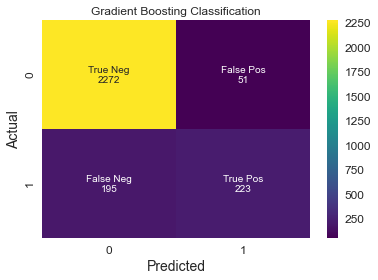

In [81]:
# Confusion Matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                gbt_corr.flatten()]

labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(gbt_corr, fmt = '',cmap = 'viridis', annot=labels);
title = "Gradient Boosting Classification"
ylabel = "Actual"
xlabel = "Predicted"
plt.title(title)
plt.ylabel(ylabel)
plt.xlabel(xlabel);

**PR Curve**

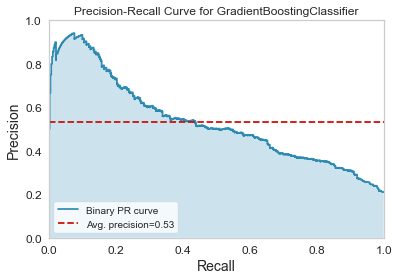

<AxesSubplot:title={'center':'Precision-Recall Curve for GradientBoostingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [82]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz3 = PrecisionRecallCurve(model_gbt, is_fitted=True)
viz3.fit(X_train_sm, y_train_sm)
viz3.score(X_test, y_test)
viz3.show()

**ROC-AUC**

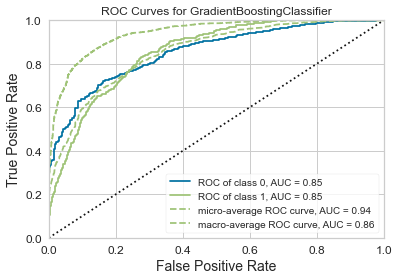

<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [83]:
visualizerroc3 = ROCAUC(
    model_gbt, classes=classes3, is_fitted=True
)

visualizerroc3.fit(X_train_sm, y_train_sm)
visualizerroc3.score(X_test, y_test)
visualizerroc3.show()

**Discrimintation Threshold**


This takes quite some time to run, so run it only when you have to write about the business insights.

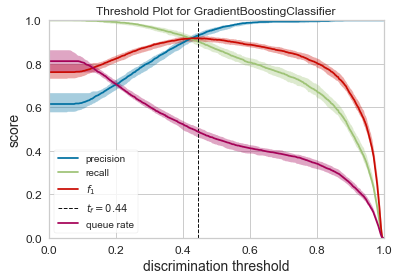

<AxesSubplot:title={'center':'Threshold Plot for GradientBoostingClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [84]:
visualizer = DiscriminationThreshold(model_gbt, is_fitted=True)

visualizer.fit(X_train_sm, y_train_sm)
visualizer.poof()

**Feature Importance**

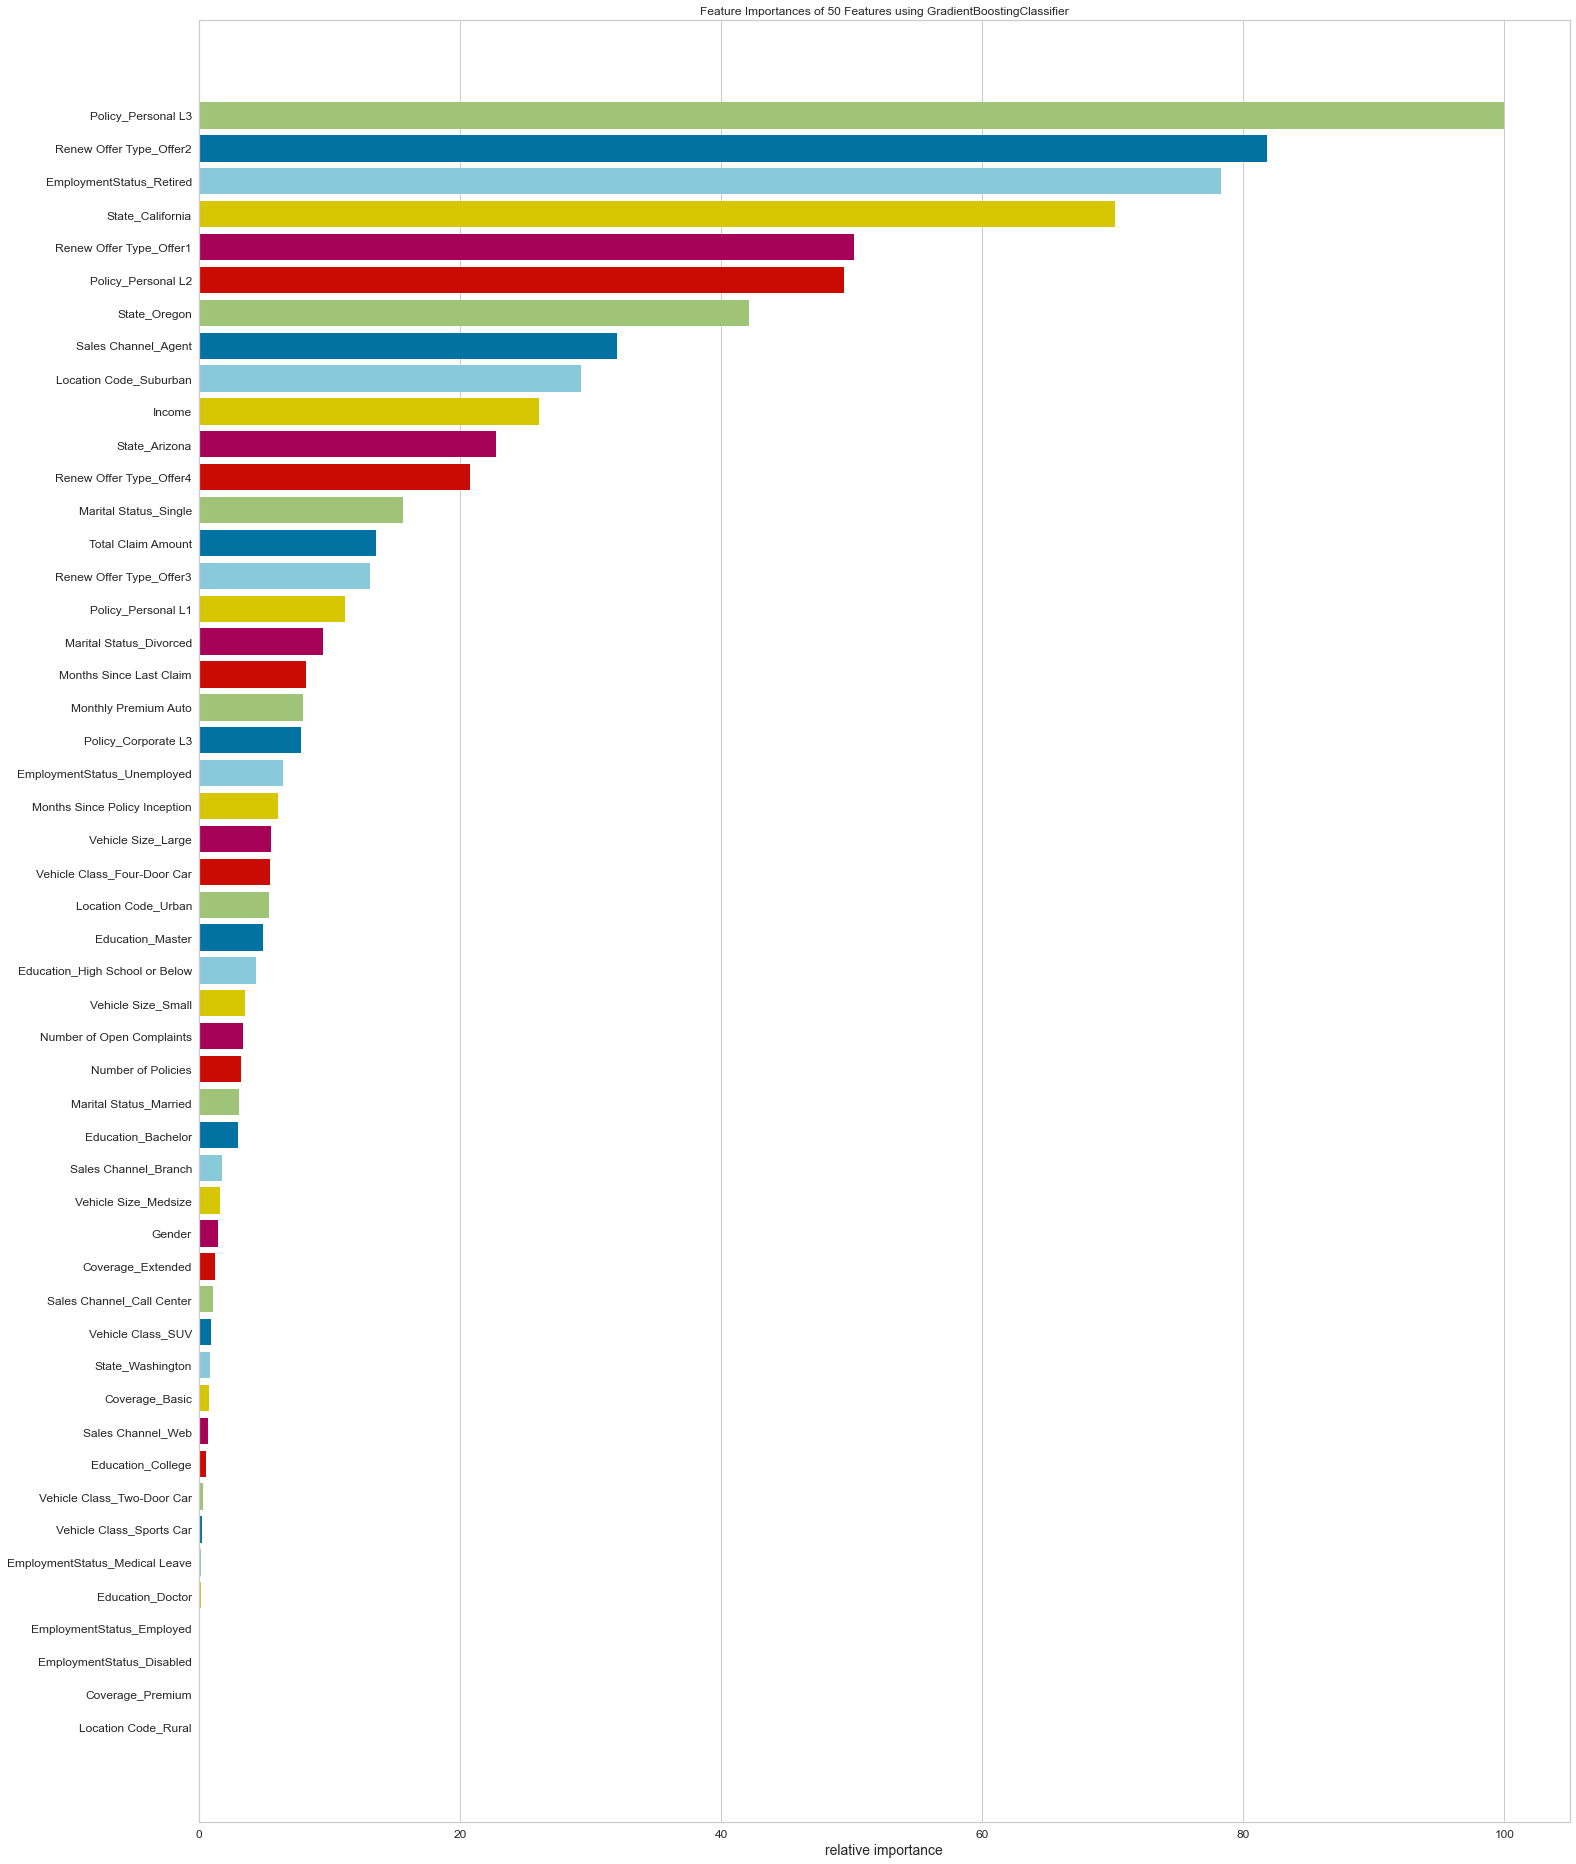

<AxesSubplot:title={'center':'Feature Importances of 50 Features using GradientBoostingClassifier'}, xlabel='relative importance'>

In [85]:
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(22, 26))
viz2 = FeatureImportances(model_gbt, labels=X_train_sm.columns)
viz2.fit(X_train_sm, y_train_sm)
viz2.poof()

**XGBoost** - THIS IS OUR FINAL MODEL

In [86]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [87]:
import xgboost as xgb

In [88]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_sm, y_train_sm)

C:\Users\Nupur\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
y_pred_xgb = xgb_model.predict(X_test)
xgb_corr = metrics.confusion_matrix(y_test, y_pred_xgb)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_xgb)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_xgb)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_xgb)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_xgb)))

Accuracy_Score: 0.9850419554906968
Precision_Score: 0.9520383693045563
Recall_Score: 0.9497607655502392
F1_Score: 0.9508982035928144


**Classification Report**

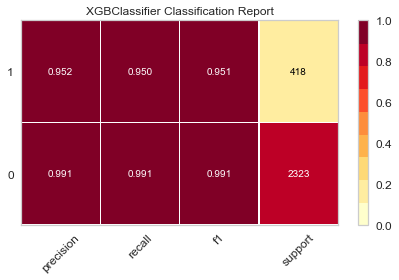

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [90]:
from yellowbrick.classifier import ClassificationReport

classes4 = ["0", "1"]

visualizer4 = ClassificationReport(
    xgb_model, classes=classes4, support=True, is_fitted=True
)

visualizer4.fit(X_train_sm, y_train_sm)
visualizer4.score(X_test, y_test)   
visualizer4.show()

**Confusion Matrix**

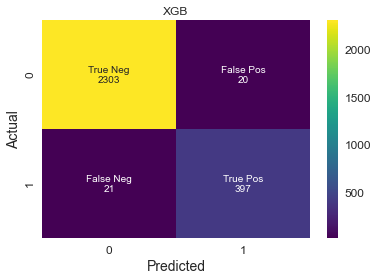

In [91]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                xgb_corr.flatten()]

labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(xgb_corr, fmt = '',cmap = 'viridis', annot=labels);
title = "XGB"
ylabel = "Actual"
xlabel = "Predicted"
plt.title(title)
plt.ylabel(ylabel)
plt.xlabel(xlabel);

**PR Curve**

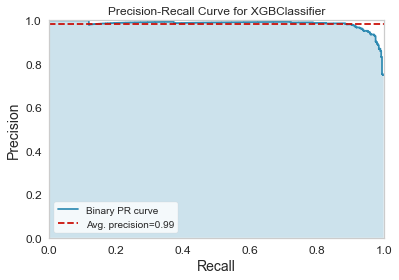

<AxesSubplot:title={'center':'Precision-Recall Curve for XGBClassifier'}, xlabel='Recall', ylabel='Precision'>

In [92]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz4 = PrecisionRecallCurve(xgb_model, is_fitted=True)
viz4.fit(X_train_sm, y_train_sm)
viz4.score(X_test, y_test)
viz4.show()

**ROC-AUC**

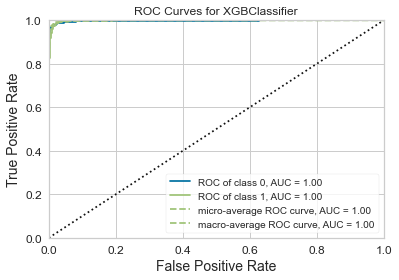

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [93]:
visualizerroc4 = ROCAUC(
    xgb_model, classes=classes4, is_fitted=True
)

visualizerroc4.fit(X_train_sm, y_train_sm)
visualizerroc4.score(X_test, y_test)
visualizerroc4.show()

**Feature Importance**

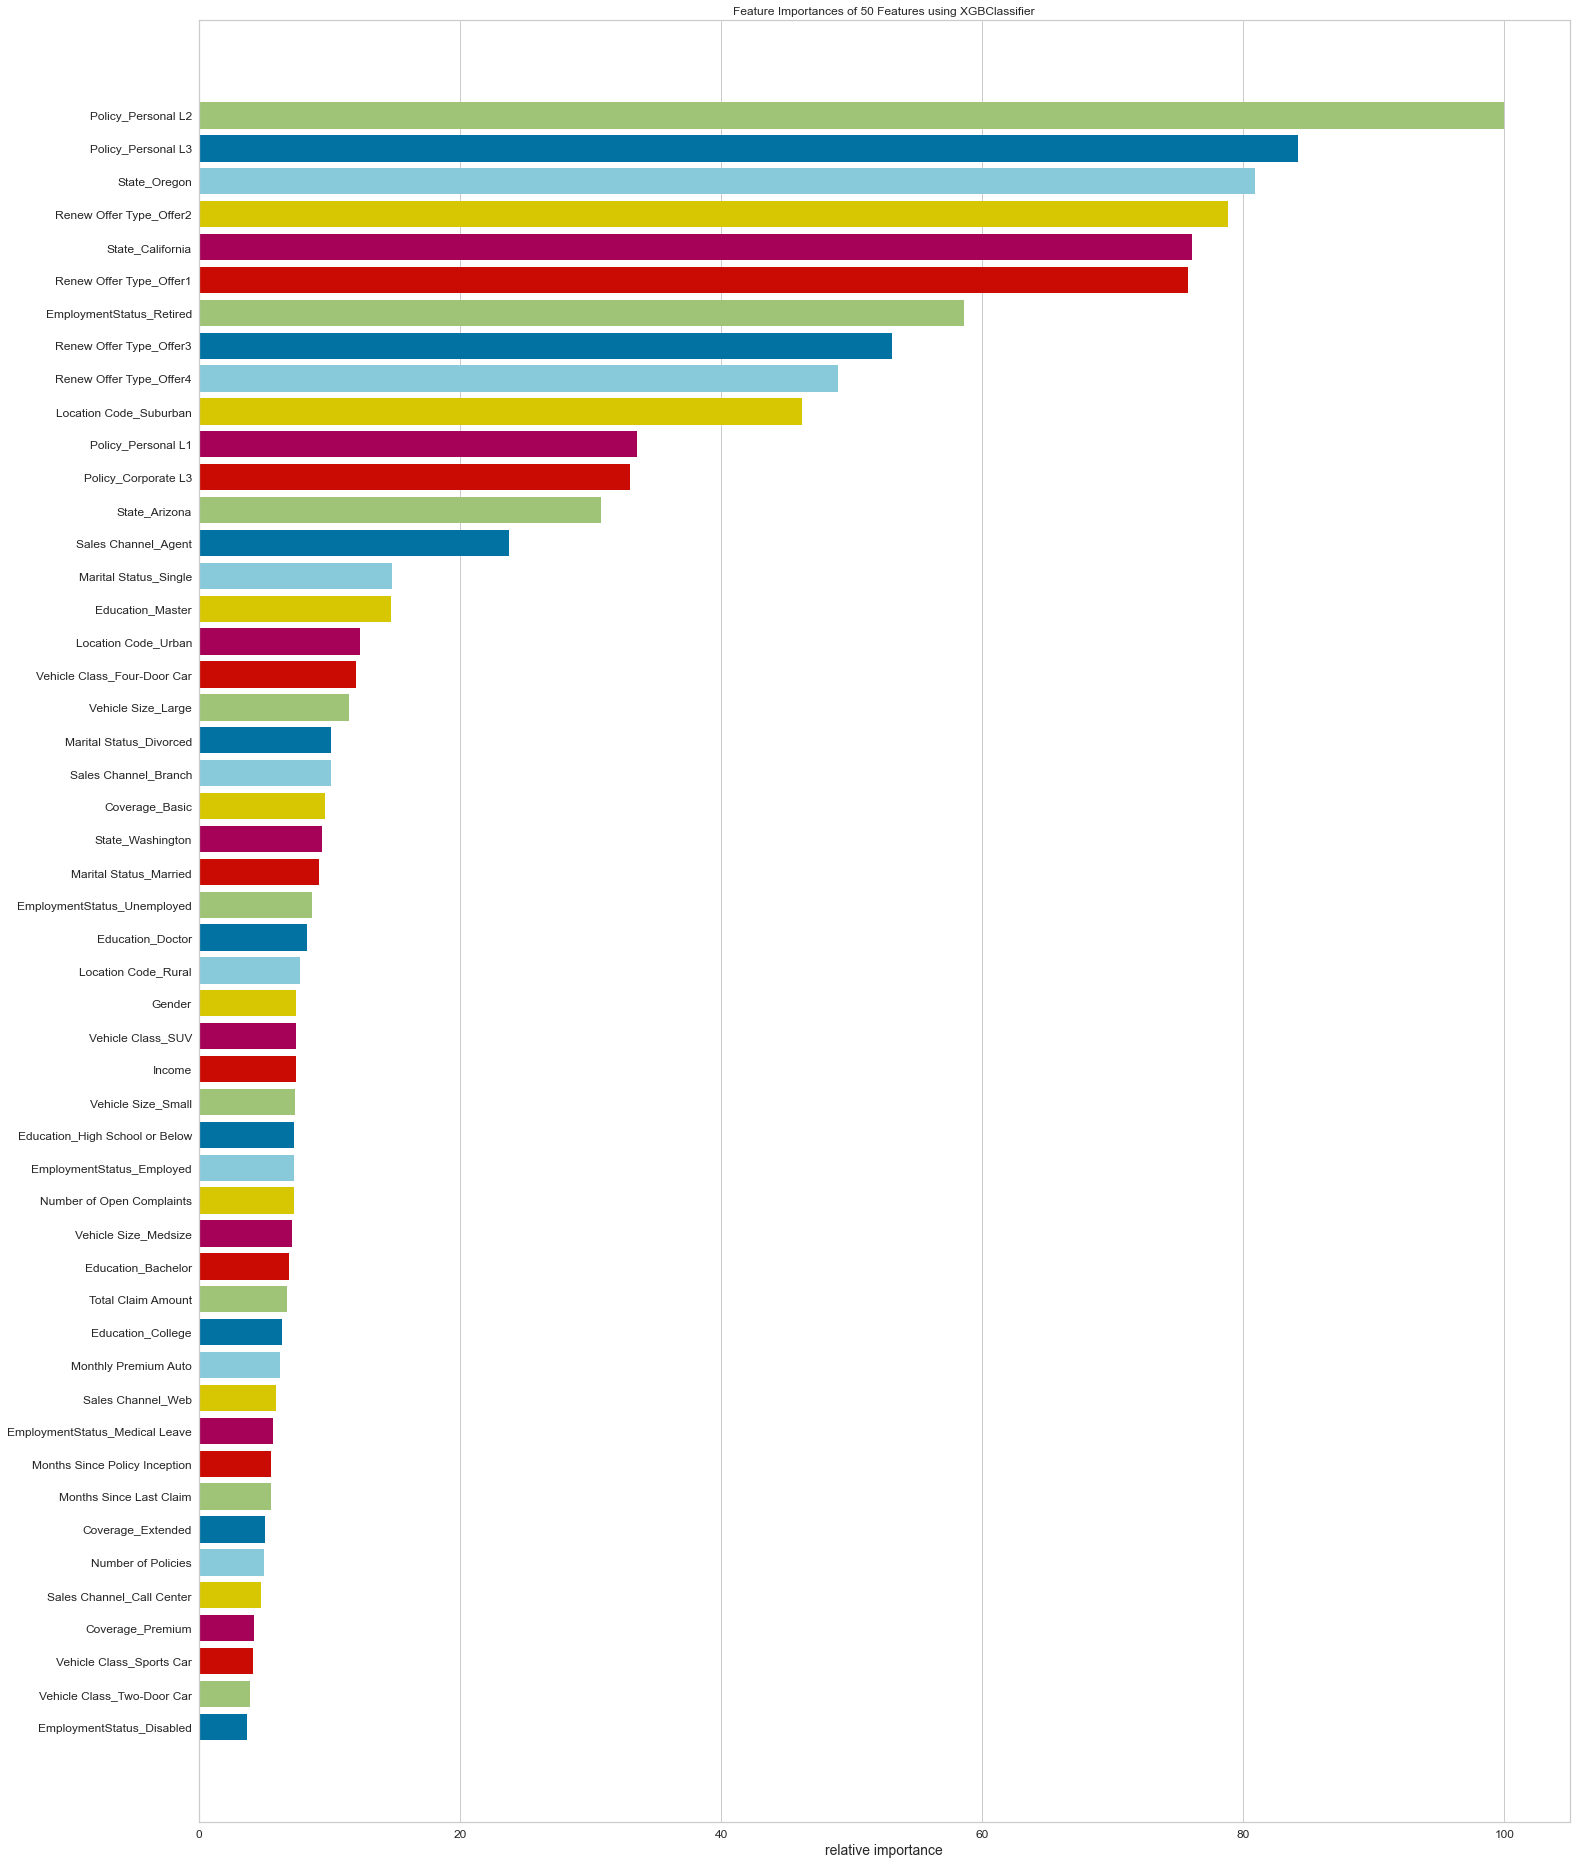

<AxesSubplot:title={'center':'Feature Importances of 50 Features using XGBClassifier'}, xlabel='relative importance'>

In [94]:
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(22, 26))
viz4 = FeatureImportances(xgb_model, labels=X_train_sm.columns)
viz4.fit(X_train_sm, y_train_sm)
viz4.poof()

In [95]:
df = pd.DataFrame(list(zip(X_train_sm.columns,xgb_model.feature_importances_)),columns=['predictor','feature importance'])
df

predictor  feature importance
0                           Gender            0.006785
1                           Income            0.006764
2             Monthly Premium Auto            0.005638
3          Months Since Last Claim            0.004983
4    Months Since Policy Inception            0.005006
5        Number of Open Complaints            0.006608
6               Number of Policies            0.004558
7               Total Claim Amount            0.006138
8                    State_Arizona            0.028012
9                 State_California            0.069103
10                    State_Oregon            0.073523
11                State_Washington            0.008534
12                  Coverage_Basic            0.008786
13               Coverage_Extended            0.004616
14                Coverage_Premium            0.003859
15              Education_Bachelor            0.006270
16               Education_College            0.005754
17                Education_Doctor            0.007544
18  Education_High School or Below            0.006615
19                Education_Master            0.013341
20       EmploymentStatus_Disabled            0.003332
21       EmploymentStatus_Employed            0.006611
22  EmploymentStatus_Medical Leave            0.005172
23        EmploymentStatus_Retired            0.053212
24     EmploymentStatus_Unemployed            0.007897
25             Location Code_Rural            0.007056
26          Location Code_Suburban            0.042001
27             Location Code_Urban            0.011236
28         Marital Status_Divorced            0.009209
29          Marital Status_Married            0.008339
30           Marital Status_Single            0.013449
31             Policy_Corporate L3            0.030005
32              Policy_Personal L1            0.030508
33              Policy_Personal L2            0.090845
34              Policy_Personal L3            0.076462
35         Renew Offer Type_Offer1            0.068848
36         Renew Offer Type_Offer2            0.071641
37         Renew Offer Type_Offer3            0.048255
38         Renew Offer Type_Offer4            0.044485
39             Sales Channel_Agent            0.021571
40            Sales Channel_Branch            0.009175
41       Sales Channel_Call Center            0.004300
42               Sales Channel_Web            0.005364
43     Vehicle Class_Four-Door Car            0.010946
44               Vehicle Class_SUV            0.006776
45        Vehicle Class_Sports Car            0.003768
46      Vehicle Class_Two-Door Car            0.003528
47              Vehicle Size_Large            0.010416
48            Vehicle Size_Medsize            0.006472
49              Vehicle Size_Small            0.006683

In [96]:
df1 = {'Features': ["Policy_Personal L2","Policy_Personal L3","State_Oregon","Renew Offer Type_Offer2","State_California","Renew Offer Type_Offer1"],
     'Importances': [0.09085,0.07646,0.07352,0.07164,0.06910,0.06885]}

summary = pd.DataFrame(df1)

Text(0, 0.5, 'Features')

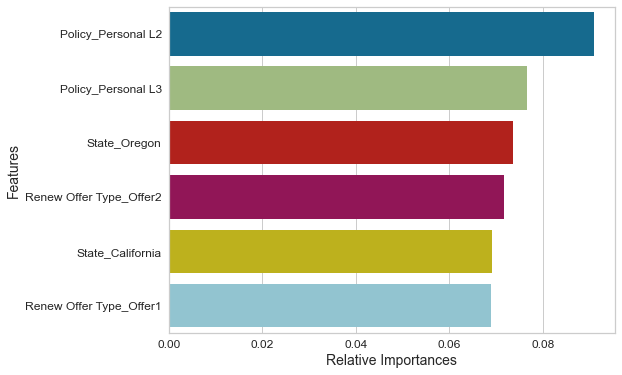

In [97]:
plt.figure(figsize=(8, 6))
splot=sns.barplot(x="Importances",y="Features",data=summary)
plt.xlabel("Relative Importances", size=14)
plt.ylabel("Features", size=14)

**Light GBM Model**

In [114]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [115]:
import lightgbm

In [116]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

In [119]:
lgbm_class_model = LGBMClassifier()
lgbm_class_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_class_model.predict(X_test)
lgbm_corr = metrics.confusion_matrix(y_test, y_pred_lgbm)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_lgbm)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_lgbm)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_lgbm)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_lgbm)))

Accuracy_Score: 0.9824881430134987
Precision_Score: 0.9671717171717171
Recall_Score: 0.916267942583732
F1_Score: 0.9410319410319411


**CATBOOST Model**

In [120]:
pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=466e630e88b6b5b78311b488b32f7c08e915fc90670c48d777664086bc2e3058
  Stored in directory: c:\users\nupur\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [121]:
import catboost

In [122]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [124]:
cat_class_model = CatBoostClassifier(verbose=0,n_estimators=100)
cat_class_model.fit(X_train, y_train)
y_pred_cat = cat_class_model.predict(X_test)
cat_corr = metrics.confusion_matrix(y_test, y_pred_cat)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_cat)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_cat)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_cat)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_cat)))

Accuracy_Score: 0.9587741700109449
Precision_Score: 0.9472140762463344
Recall_Score: 0.7727272727272727
F1_Score: 0.8511198945981555


**Summary of Model Scores**

In [52]:
df = {'Models': ["Logistic Regression","Random Forest Classifier","Gradient Boosting Classifier", 'XG Boost','LightGBM','CATBOOST'],
     'Accuracy Scores': [0.7190,0.949,0.879,0.9850,0.9824,0.9587],
     'Precision Score': [0.3147,0.9504,0.6029,0.9520,0.9671,0.9472],
     'Recall Score': [0.7153,0.6889,0.2942,0.9497,0.9162,0.7727],
     'F1 Score': [0.4371,0.7988,0.508,0.9508,0.9410,0.8511]}

summary = pd.DataFrame(df)

Text(0, 0.5, 'Models')

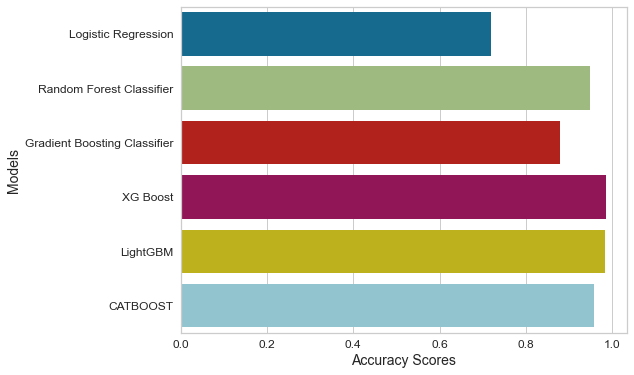

In [53]:
plt.figure(figsize=(8, 6))
splot=sns.barplot(x="Accuracy Scores",y="Models",data=summary)
plt.xlabel("Accuracy Scores", size=14)
plt.ylabel("Models", size=14)

Text(0, 0.5, 'Models')

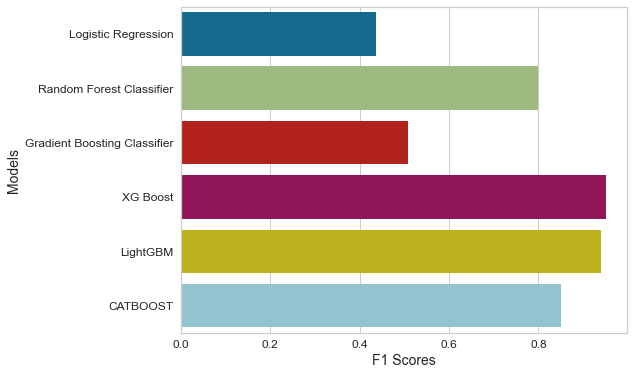

In [54]:
plt.figure(figsize=(8, 6))
splot=sns.barplot(x="F1 Score",y="Models",data=summary)
plt.xlabel("F1 Scores", size=14)
plt.ylabel("Models", size=14)

From the F1 scores it was observed that XGBoost performed the best among all other models and F1 score was considered as measure of performance rather than accuracy score as the data was imbalanced and for imbalanced data F1 scores are best suited.
Note that hyper tuning was only performed for random Forest and GBT because they had lower scored and could have been improved. For the rest of the models including XG BOost, LightGBM and CATOOSt, the performnace was alreday hight. In order to prevent overfitting, no hyper tuning was performed. 